### Fit a Random Forest model
To test if the data is trainable.  
To test the training time is acceptable.

In [3]:
# ! pip install -U scikit-learn

     ---------------------------------------- 7.5/7.5 MB 5.6 MB/s eta 0:00:00
     -------------------------------------- 298.0/298.0 kB 1.5 MB/s eta 0:00:00
     -------------------------------------- 40.1/40.1 MB 947.9 kB/s eta 0:00:00


In [11]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
import pandas as pd
import numpy as np

x_train = pd.read_csv('reduceddata/x_train_norm.csv', header=None)
y_train = pd.read_csv('reduceddata/y_train_log.csv', header=None)
print(x_train.shape, y_train.shape)

(26548, 21) (26548, 1)


In [13]:
# regr = RandomForestRegressor(max_depth=4, random_state=0)
regr = GradientBoostingRegressor(random_state=0)
regr.fit(x_train, y_train)

c:\Users\Weber\.conda\envs\testAI\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingRegressor(random_state=0)

In [14]:
regr.score(x_train, y_train)

0.569820934461021

In [15]:
from sklearn.metrics import mean_squared_error
x_test = pd.read_csv('reduceddata/x_test_norm.csv', header=None)
y_test = pd.read_csv('reduceddata/y_test_log.csv', header=None)
y_pred = regr.predict(x_test)

mse = mean_squared_error(y_test, y_pred)

In [16]:
mse

2.590929074432077

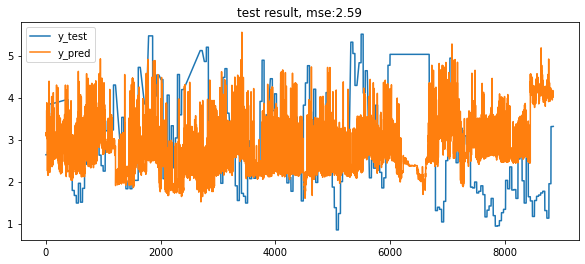

In [17]:
# test data
import matplotlib.pyplot as plt
plt.figure(figsize=(10,4))
x = list(range(len(y_test)))
plt.plot(x, y_test, label = "y_test")
plt.plot(x, y_pred, label = "y_pred")
plt.legend()
plt.title(f'test result, mse:{mse:.2f}')
plt.show()

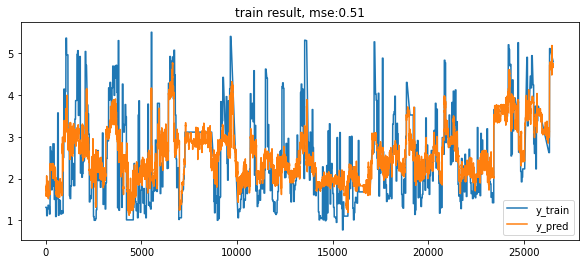

In [18]:
# train data
import matplotlib.pyplot as plt
plt.figure(figsize=(10,4))
x = list(range(len(x_train)))
y_train_pred = regr.predict(x_train)
mse_train = mean_squared_error(y_train, y_train_pred)
plt.plot(x, y_train, label = "y_train")
plt.plot(x, y_train_pred, label = "y_pred")
plt.legend()
plt.title(f'train result, mse:{mse_train:.2f}')
plt.show()